In [1]:
import requests
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
#Task 1. Write down all the ftp links from there into a file.
#Write data from the file
rawData = requests.get('https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/references').content 
f = open("ftps.txt", "w")
#write to the file all lines that match the pattern 'ftp<any letter, number, "_", "#">.<any letter, number or "_">'
f.write('\n'.join(re.findall(r'ftp[/\w#.]*[\.\w*]', rawData.decode('utf-8'))))
f.close()

In [4]:
#Task 2. Extract all the numbers from the story.
#Write data from the file
rawText = requests.get('https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/2430AD').content
re.findall(r'[-+]?(\d*\.\d+|\d+)', rawText.decode('utf-8')) 

['2430',
 '1969',
 '2430',
 '2430',
 '57',
 '57',
 '1970',
 '3.68',
 '35',
 '460',
 '2430']

In [5]:
#Task 3. Extract all words with the letter a in them, register doesn't matter.
re.findall(r'\b\w*[a|A][\w\']*\b', rawText.decode('utf-8'))

['A',
 'and',
 'dawn',
 'and',
 'all',
 'ache',
 'have',
 'a',
 'nightmare',
 'a',
 'are',
 'all',
 'and',
 'a',
 'gleam',
 'anywhere',
 'an',
 'original',
 'a',
 'personality',
 'packed',
 'talk',
 'said',
 'Alvarez',
 'said',
 'Social',
 'eventually',
 'An',
 'character',
 'escaped',
 'adjustment',
 'talking',
 'irritates',
 'past',
 'tact',
 'along',
 'Trail',
 'was',
 'as',
 'always',
 'sparsely',
 'have',
 'taken',
 'and',
 'Alvarez',
 'walking',
 'Alvarez',
 'was',
 'tall',
 'and',
 'rather',
 'athletic',
 'a',
 'muscular',
 'activities',
 'stairs',
 'and',
 'rampways',
 'instance',
 'almost',
 'an',
 'character',
 'and',
 'avoided',
 'sunlamps',
 'and',
 'was',
 'pale',
 'said',
 'want',
 'can',
 'have',
 'square',
 'space',
 'and',
 'has',
 'apartment',
 'Rather',
 'a',
 'a',
 'way',
 'said',
 'Alvarez',
 'And',
 'a',
 'Alvarez',
 'added',
 'matter',
 'reach',
 'peak',
 'reach',
 'reach',
 'goal',
 'All',
 'mankind',
 'And',
 'said',
 'at',
 'that',
 'way',
 'that',
 'against',

In [6]:
#Task 4. Extract all exclamatory sentences from the story.
re.findall(r'[A-Z][^\.?!]*!', rawText.decode('utf-8'))

['Yes!',
 'Literally!',
 'There was once a time!',
 'Centuries ago!',
 'Think, Cranwitz!',
 'If we succeed!']

In [7]:
#Task 5. Distribution of lengths of unique words (not including register, length from 1) in the text.
unique_words = {}
dict_for_length = {}
#Take all the words out of the text
match_pattern = (re.findall(r'\b[\w\'-]+\b',rawText.decode('utf-8').lower()))
#Make a dictionary with unique words and their lengths
for word in match_pattern:
    count = unique_words.get(word,0)
    unique_words[word] = int(len(word))
words_length = list(unique_words.values()) #make a list of the lengths of unique words
#Make a dictionary containing the length of a word and the proportion of words of that length among unique words
for length in words_length:
    count = dict_for_length.get(length,0)
    dict_for_length[length] = count+1
number_of_unique_words = sum(dict_for_length.values())
for len_word in dict_for_length:
    dict_for_length[len_word] = round(dict_for_length[len_word]/number_of_unique_words, 3)

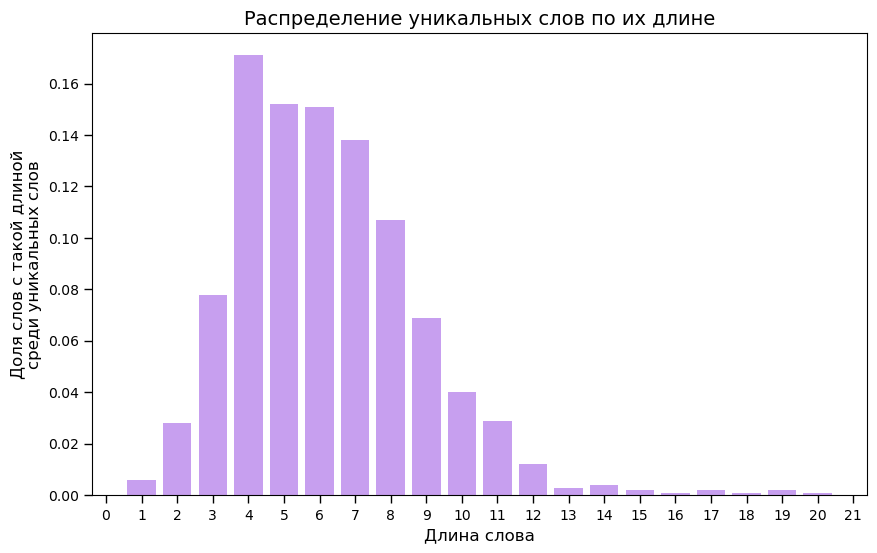

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(dict_for_length.keys(), dict_for_length.values(), color = '#C79FEF')
plt.xlabel('Длина слова', size=12)
plt.ylabel('Доля слов с такой длиной\nсреди уникальных слов', size=12)
plt.title('Распределение уникальных слов по их длине', size=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.tick_params(width=1, length=6, labelsize=10);

In [ ]:
#Task 6. Function-translator from Russian to "brick language". 
def brick_language(text):
    return re.sub(r'([АЕИУОЭЯЫЯЮЁаеуиоэыяюё])', r'\1к\1', text.capitalize())

In [ ]:
#Task 7. Function for extracting sentences with a given number of words from the text.
def extracting_n_word_sentences_from_text(text, n_words):
    answer=[]
    all_sentences = re.findall(r' ?([а-яА-Я ]+?\.|[а-яА-Я ]+?$)',text) #Divide the whole text into sentences
    for sentence in all_sentences:
        words = tuple(re.findall(r'([а-яА-Я]+)\.?', sentence)) #From each sentence we make a tuple
    #Check the length of the sentence
    if len(words) == n_words:
        answer.append(words)
    return(answer)